In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-world-smartphones-dataset/smartphones.csv


In [2]:
import pandas as pd
df=pd.read_csv("/kaggle/input/real-world-smartphones-dataset/smartphones.csv")

In [14]:
df.sample(5)

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
898,xiaomi,Xiaomi Redmi 9 Activ,7499,6.8,0,helio,8.0,2.3,5000.0,0,...,64,6.53,60,2,android,13.0,5.0,1,1600,720
725,tecno,Tecno Spark 9 (3GB RAM + 64GB),8390,6.3,0,helio,8.0,2.3,5000.0,0,...,64,6.60,90,2,android,13.0,8.0,1,1600,720
375,oppo,Oppo Find X5 Pro 5G,79990,NaN,1,snapdragon,8.0,3.0,5000.0,1,...,256,6.70,120,3,android,50.0,32.0,0,3216,1440
249,motorola,Motorola Moto S30 Pro,23990,8.3,1,snapdragon,8.0,2.9,4400.0,1,...,128,6.55,144,3,android,50.0,32.0,0,2460,1080
71,google,Google Pixel 6A,29999,7.1,1,google,8.0,NaN,4410.0,1,...,128,6.14,60,2,android,12.2,8.0,0,2400,1080


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

In [5]:
df.shape

(980, 22)

In [6]:
df.describe()


,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
count,980.000000,879.000000,980.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,975.000000,980.000000,980.000000,980.000000
mean,32520.504082,7.825825,0.560204,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,50.319286,16.589744,0.630612,2214.663265,1075.852041
std,39531.812669,0.740285,0.496616,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,33.000968,10.876944,0.482885,516.484254,290.164931
min,3499.000000,6.000000,0.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,2.000000,0.000000,0.000000,480.000000,480.000000
25%,12999.000000,7.400000,0.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,24.000000,8.000000,0.000000,1612.000000,1080.000000
50%,19994.500000,8.000000,1.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,50.000000,16.000000,1.000000,2400.000000,1080.000000
75%,35491.500000,8.400000,1.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,64.000000,16.000000,1.000000,2408.000000,1080.000000
max,650000.000000,8.900000,1.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,200.000000,60.000000,1.000000,3840.000000,2460.000000


In [8]:
average = df['price'].mean()
print(average)

32520.504081632655


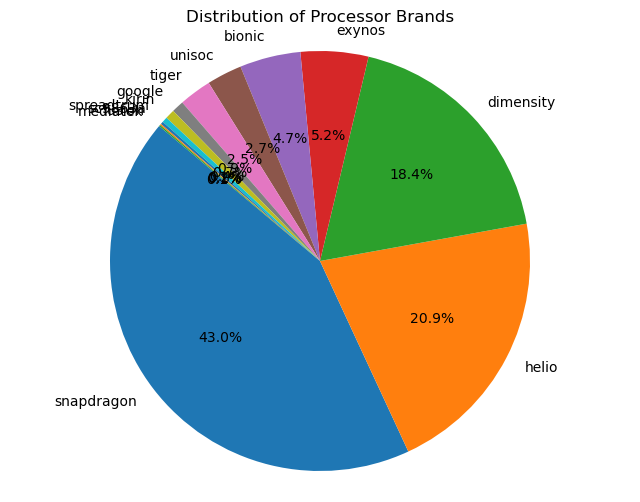

In [18]:
brand_counts = df['processor_brand'].value_counts()
import matplotlib.pyplot as plt

# Create a pie chart
plt.figure(figsize=(8, 6))  # Optional: adjust the figure size
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140)


# Add a title
plt.title('Distribution of Processor Brands')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [23]:
unique_values = df['refresh_rate'].unique()
print(unique_values)

[ 60 120 144 165  90 240]


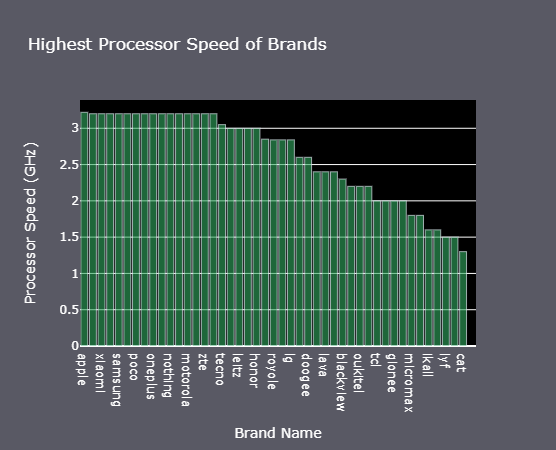

In [25]:
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as pyo

# Group by brand and find the maximum processor speed
max_processor_speed_by_brand = df.groupby('brand_name')['processor_speed'].max().reset_index()

# Sort the data by processor speed in descending order
max_processor_speed_by_brand = max_processor_speed_by_brand.sort_values(by='processor_speed', ascending=False)

# Create the bar graph using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=max_processor_speed_by_brand['brand_name'],
    y=max_processor_speed_by_brand['processor_speed'],
    marker_color='rgba(50, 171, 96, 0.6)',  # Adjust color as needed
))

# Update the layout for better aesthetics
fig.update_layout(
    title='Highest Processor Speed of Brands',
    xaxis_title='Brand Name',
    yaxis_title='Processor Speed (GHz)',
    plot_bgcolor='black',
    paper_bgcolor='#595964',
    font=dict(color='white')
)

# Initialize notebook mode and display the interactive plot
pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5

/tmp/ipykernel_32/545467485.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



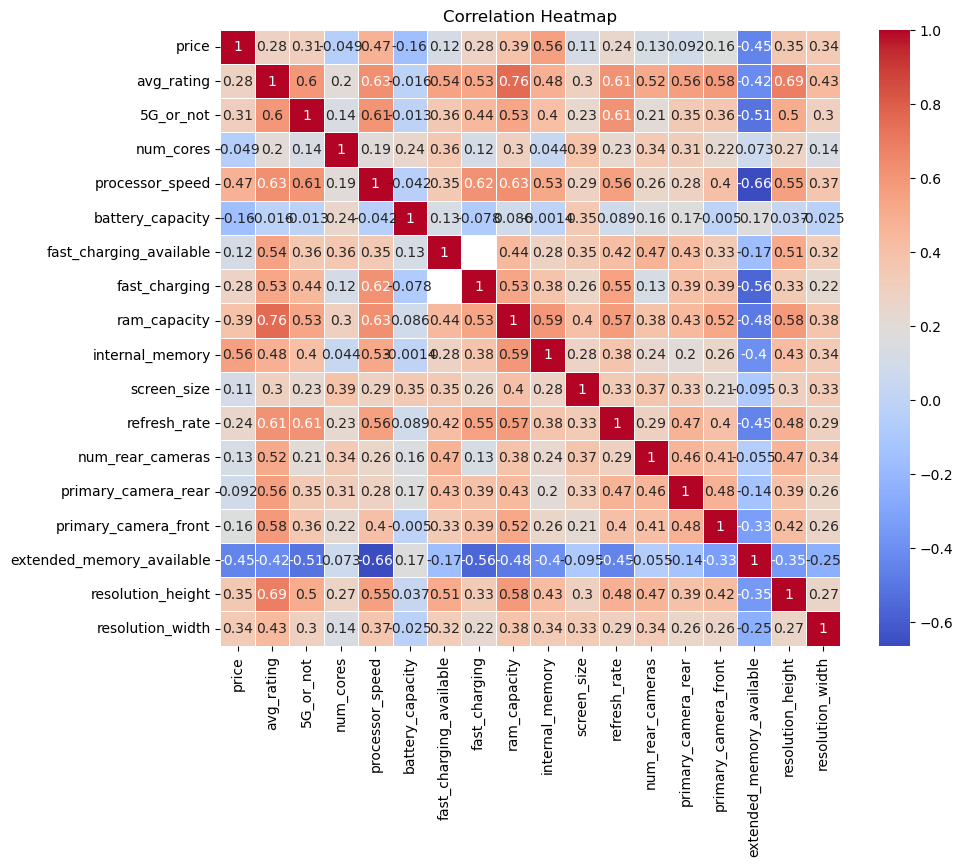

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Set up the plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [31]:
correlation_matrix = df.corr()

# Find columns with the highest correlation values
threshold = 0.6  # Set your correlation threshold
high_correlation_pairs = (correlation_matrix.abs() > threshold) & (correlation_matrix < 1.0)
high_correlation_cols = [column for column in high_correlation_pairs.columns if any(high_correlation_pairs[column])]

# Display the list of columns with high correlations
print("Columns with High Correlations:")
print(high_correlation_cols)

Columns with High Correlations:
['avg_rating', '5G_or_not', 'processor_speed', 'fast_charging', 'ram_capacity', 'refresh_rate', 'extended_memory_available', 'resolution_height']


/tmp/ipykernel_32/1293391284.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



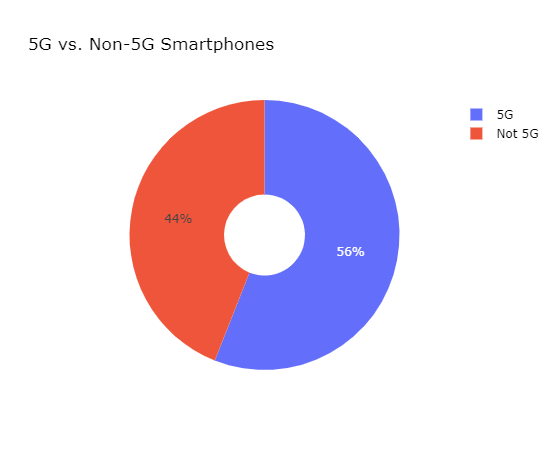

In [32]:
count_5g = df['5G_or_not'].value_counts()

labels = ['5G', 'Not 5G']
values = count_5g.values

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3)])

fig.update_layout(title='5G vs. Non-5G Smartphones',
                  plot_bgcolor='white',
                  paper_bgcolor='white',
                  font=dict(color='black'))

fig.show()